In [1]:
# basics
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# ML Algorithms and others
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

# data splitting
from sklearn.model_selection import train_test_split

# hyperparameter handling
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D


/home/contagious/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv("./data/mm.data") #load train data
df.columns = ['BI-RADS', 'Age','Shape','Margin','Density','Severity']
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
BI-RADS     960 non-null object
Age         960 non-null object
Shape       960 non-null object
Margin      960 non-null object
Density     960 non-null object
Severity    960 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [4]:
df.describe()

,Severity
count,960.000000
mean,0.462500
std,0.498852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
dt=df.replace('?', np.nan)
dt.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,NaN,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,NaN,1
4,4,65,1,NaN,3,0


In [6]:
total = dt.isnull().sum().sort_values(ascending=False)
percent1 = dt.isnull().sum()/dt.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingData = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingData.head()

,Total,%
Density,76,7.9
Margin,48,5.0
Shape,31,3.2
Age,5,0.5
BI-RADS,2,0.2


In [7]:
dt['Density'] = dt['Density'].replace(np.nan, 100)
dt['Density']=dt['Density'].astype(int)

dt['Margin'] = dt['Margin'].replace(np.nan, 100)
dt['Margin']=dt['Margin'].astype(int)

dt['Shape'] = dt['Shape'].replace(np.nan, 100)
dt['Shape']=dt['Shape'].astype(int)


dt['Age'] = dt['Age'].replace(np.nan, 100)
dt['Age']=dt['Age'].astype(int)


dt['BI-RADS'] = dt['BI-RADS'].replace(np.nan, 0)
dt['BI-RADS']=dt['BI-RADS'].astype(int)


dt.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,100,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,100,1
4,4,65,1,100,3,0


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
BI-RADS     960 non-null int64
Age         960 non-null int64
Shape       960 non-null int64
Margin      960 non-null int64
Density     960 non-null int64
Severity    960 non-null int64
dtypes: int64(6)
memory usage: 45.1 KB


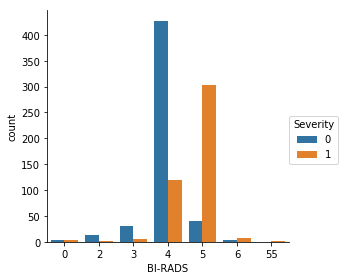

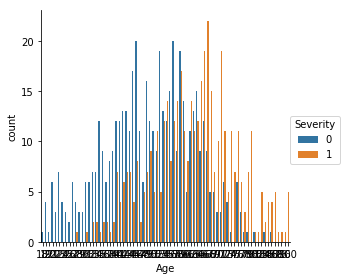

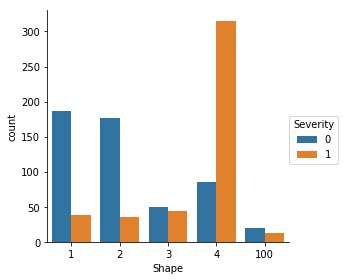

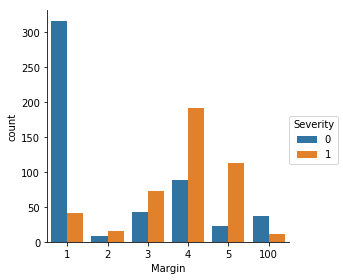

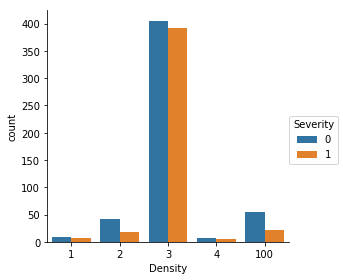

In [9]:
df_plot=dt
sns.factorplot('BI-RADS', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Age', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Shape', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Margin', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Density', data = df_plot, kind = 'count', hue='Severity')


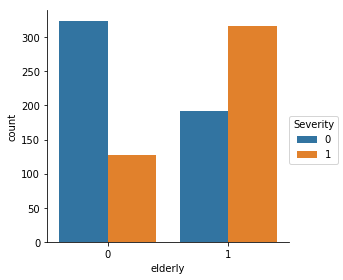

In [10]:
dt['elderly'] = np.where(dt['Age']<=55, 0,1)
sns.factorplot('elderly', data = df_plot, kind = 'count', hue='Severity')

In [11]:
#dt.groupby('elderly').count()
print(min(dt['Age']))
print(max(dt['Age']))

18
100


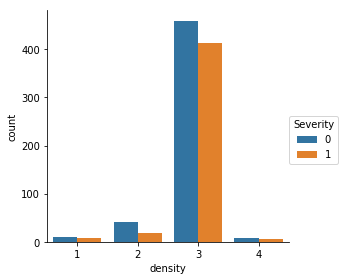

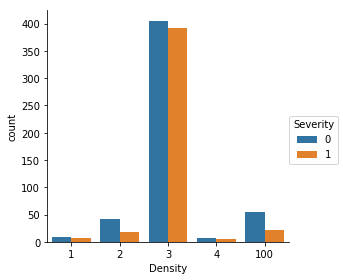

In [12]:
dt['density'] = np.where(dt['Density']==100, 3,dt['Density'])
sns.factorplot('density', data = dt, kind = 'count', hue='Severity')
sns.factorplot('Density', data = dt, kind = 'count', hue='Severity')

#del dt['Density']

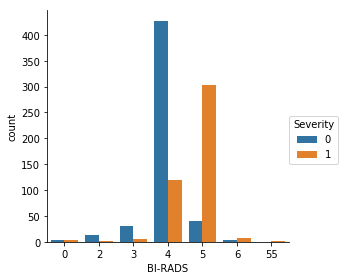

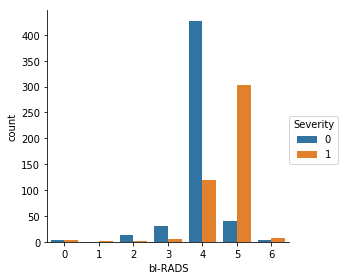

In [13]:
dt['bI-RADS'] = np.where(dt['BI-RADS']==100 ,np.random.randint(low=1, high=6),dt['BI-RADS'])
dt['bI-RADS'] = np.where(dt['BI-RADS']==55 ,np.random.randint(low=1, high=6),dt['BI-RADS'])
sns.factorplot('BI-RADS', data = dt, kind = 'count', hue='Severity')
sns.factorplot('bI-RADS', data = dt, kind = 'count', hue='Severity')    

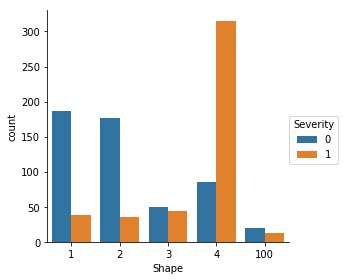

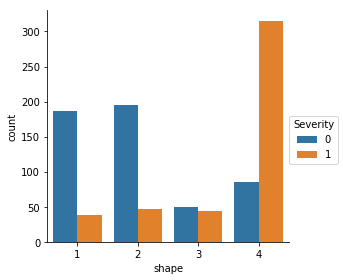

In [14]:
dt['shape'] = np.where(dt['Shape']==100,np.random.randint(low=0, high=5),dt['Shape'])
sns.factorplot('Shape', data = dt, kind = 'count', hue='Severity')
sns.factorplot('shape', data = dt, kind = 'count', hue='Severity')    

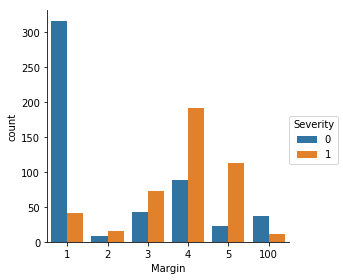

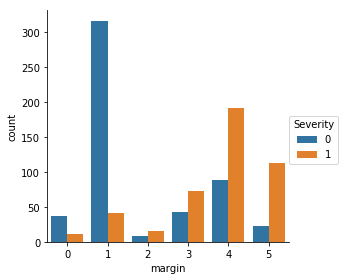

In [15]:
dt['margin'] = np.where(dt['Margin']==100,np.random.randint(low=0, high=6),dt['Margin'])
sns.factorplot('Margin', data = dt, kind = 'count', hue='Severity')
sns.factorplot('margin', data = dt, kind = 'count', hue='Severity')    

In [16]:
del dt['Density'] 
del dt['Margin']
del dt['Shape'] 
del dt['Age'] 
del dt['BI-RADS'] 
dt.head()

,Severity,elderly,density,bI-RADS,shape,margin
0,1,0,3,4,1,1
1,1,1,3,5,4,5
2,0,0,3,4,1,1
3,1,1,3,5,1,5
4,0,1,3,4,1,0


In [129]:
train,test = train_test_split(dt, train_size=0.8,test_size=0.2, random_state=42)

In [130]:
feature_col_names=['elderly','density','bI-RADS','shape','margin']
predicted_class_name=['Severity']
X_train= train[feature_col_names].values #predictor feature columns (10 x m)
y_train=train[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)
X_test=test[feature_col_names].values #predictor feature columns (10 x m)
y_test=test[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)

In [131]:
rf = RandomForestClassifier(random_state = 42)
print('Hyperparameters currently in use:\n')
pprint(rf.get_params())

Hyperparameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Hyperparameter Evaluation

### n_estimators

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

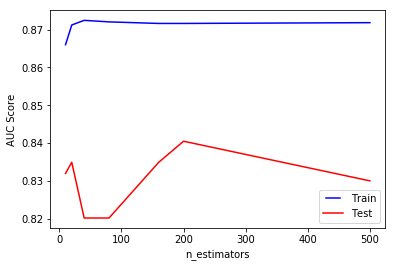

In [132]:
n_estimators = [10, 20, 40, 80, 160,200,500]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

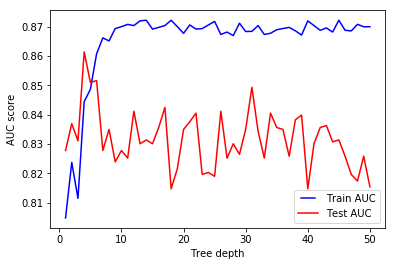

In [133]:
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

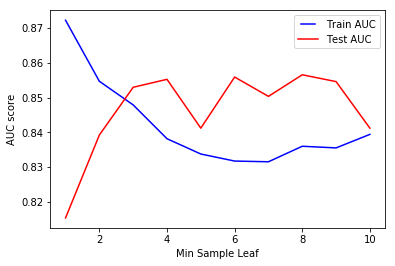

In [134]:
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
train_results = []
test_results = []
for min_samples_l in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_l, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Leaf')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


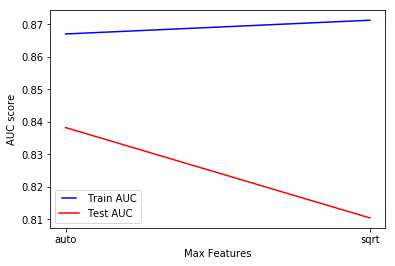

In [135]:
max_features = ['auto', 'sqrt']
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max Features')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

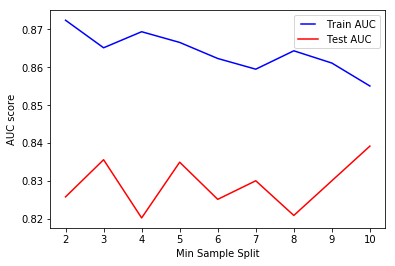

In [136]:
min_samples_split = [2,3,4,5,6,7,8,9,10]
train_results = []
test_results = []
for mss in min_samples_split:
    rf = RandomForestClassifier(min_samples_split=mss, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Split')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


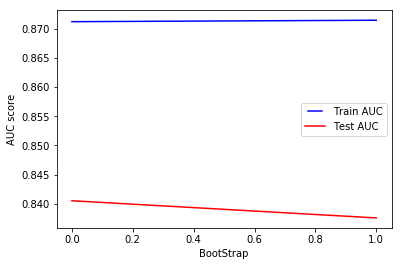

In [137]:
bootstrap = [True, False]
train_results = []
test_results = []
for bt in bootstrap:
    rf = RandomForestClassifier(bootstrap=bt, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(bootstrap, train_results, 'b', label='Train AUC')
line2, = plt.plot(bootstrap, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('BootStrap')
plt.show()

In [165]:
rf_model = RandomForestClassifier(n_estimators=50)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

print('Model Performance')
default_accuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(default_accuracy))

Model Performance
Train data Accuracy: 0.8724
Test data Accuracy: 0.8229


## Randomized SearchCV

In [166]:
# Number of trees in random forest -OK
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 110, num = 9)]
# Number of features to consider at every split -OK
max_features = [ 'auto','sqrt'] 
# Maximum number of levels in tree - OK
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
# Minimum number of samples required to split a node -OK
min_samples_split = [5,6,7,8,9]
# Minimum number of samples required at each leaf node -OK
min_samples_leaf = [1,2,3,4,5,6,7]
# Method of selecting samples for training each tree - OK
bootstrap = [True,False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [167]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.ravel());

rf_random_train = rf_random.predict(X_train)
rf_random_test = rf_random.predict(X_test)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV] n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV] n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV] n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.2s
[CV] n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.2s
[CV]  n_estimators=102, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.2

[CV] n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=97, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.3s
[CV] n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=97, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.2s
[CV] n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.2s


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s


[CV] n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


In [168]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': True}

In [172]:
random_accuracy=metrics.accuracy_score(y_test, rf_random_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_random_train)))
print("Test data Accuracy: {0:.4f}".format(random_accuracy))

Train data Accuracy: 0.8411
Test data Accuracy: 0.8646


In [173]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - default_accuracy)/default_accuracy ))

Improvement of 5.06%.


### Grid SearchCV

In [144]:
# Number of trees in random forest -OK
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 210, num = 9)]
# Number of features to consider at every split -OK
max_features = [ 'sqrt'] 
# Maximum number of levels in tree - OK
max_depth = [int(x) for x in np.linspace(10, 40, num = 5)]
# Minimum number of samples required to split a node -OK
min_samples_split = [7,8,9]
# Minimum number of samples required at each leaf node -OK
min_samples_leaf = [2,3,4,5,6,7,8]
# Method of selecting samples for training each tree - OK
bootstrap = [True]

# Create the  grid
p_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)




{'bootstrap': [True, False],
 'max_depth': [20, 22, 24, 26, 28, 31, 33, 35, 37, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
 'min_samples_split': [5, 6, 7, 8, 9],
 'n_estimators': [400, 401, 402, 403, 405, 406, 407, 408, 410]}


In [145]:
rf_grid = GridSearchCV(estimator=rf_model,param_grid=p_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

rf_grid .fit(X_train, y_train.ravel());

rf_grid_train = rf_grid .predict(X_train)
rf_grid_test = rf_grid .predict(X_test)


Fitting 5 folds for each of 945 candidates, totalling 4725 fits
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.4s
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, t

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s


[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 


KeyboardInterrupt: 

In [ ]:
grid_accuracy=metrics.accuracy_score(y_test, rf_grid_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_grid_train)))
print("Test data Accuracy: {0:.4f}".format(grid_accuracy))

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - default_accuracy) ))